## 49 - Perspective Transforms

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

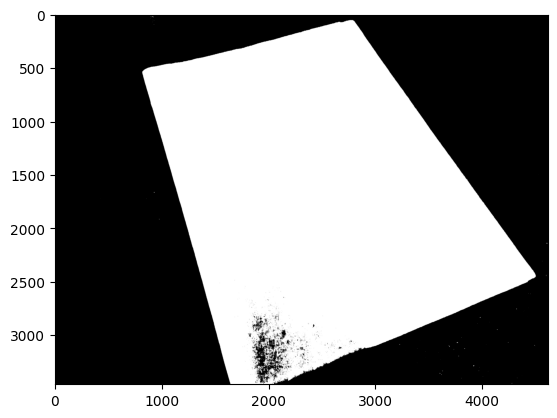

In [10]:
image = cv2.imread('/Users/alireza/Coding/OpenCV_Learning/OpenCV_Learnings/Images/paper.jpg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(th2, cmap='gray')


Number of Contours found = 179


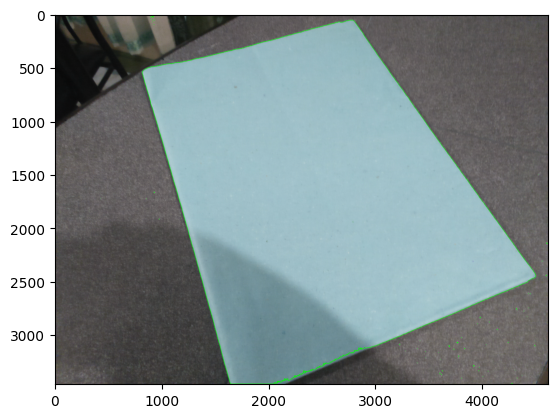

In [11]:

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 3)
plt.imshow(image)

print("Number of Contours found = " + str(len(contours)))

#### **Approxiamte our contour above to just 4 points using approxPolyDP**/

In [12]:
# Sort contours large to small by area

sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

# loop over the contours
for cnt in sorted_contours:
	# approximate the contour
	perimeter = cv2.arcLength(cnt, True)
	approx = cv2.approxPolyDP(cnt, 0.05 * perimeter, True)
 
	if len(approx) == 4:
		break

# Our x, y cordinates of the four corners 
print("Our 4 corner points are:")
print(approx)



Our 4 corner points are:
[[[2788   57]]

 [[ 817  539]]

 [[1641 3459]]

 [[4498 2456]]]


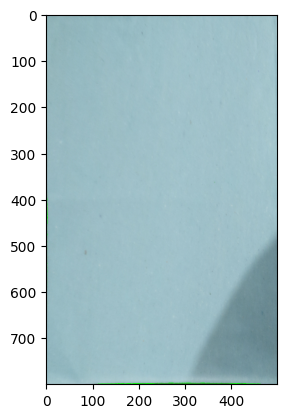

In [15]:
# Order obtained here is top left, bottom left, bottom right, top right
inputPts = np.float32(approx)

outputPts = np.float32([[0,0],
                       [0,800],
                       [500,800],
                       [500,0]])

# Get our Transform Matrix, M
M = cv2.getPerspectiveTransform(inputPts,outputPts)

# Apply the transform Matrix M using Warp Perspective
dst = cv2.warpPerspective(image, M, (500,800))

plt.imshow( dst)

#### Source:

https://www.udemy.com/course/modern-computer-vision/?srsltid=AfmBOooxRBer_tOv59XXnIduo8QXtrSzRTz1dr3oNS7YRayItH9IfdEi